## Data Import

In [5]:
import pandas as pd

# import data from data/ directory
df_train = pd.read_csv('data/train.csv')
df_store = pd.read_csv('data/store.csv')
df_test = pd.read_csv('data/test.csv')

/tmp/ipykernel_58414/1664104873.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/train.csv')


## Data Insights
### Das Nachfolgende Kapitel dient dazu, sich mit den Daten vertraut zu machen und erste Charts zu erstellen.

In [6]:
df_train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
780782,1068,4,2013-08-01,4167,266,1,1,0,1
735781,667,2,2013-09-10,10761,881,1,1,0,0
246931,324,6,2014-12-20,3493,457,1,0,0,0
27174,415,2,2015-07-07,5302,456,1,0,0,0
130544,90,7,2015-04-05,0,0,0,0,0,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# check for missing values
df_train.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

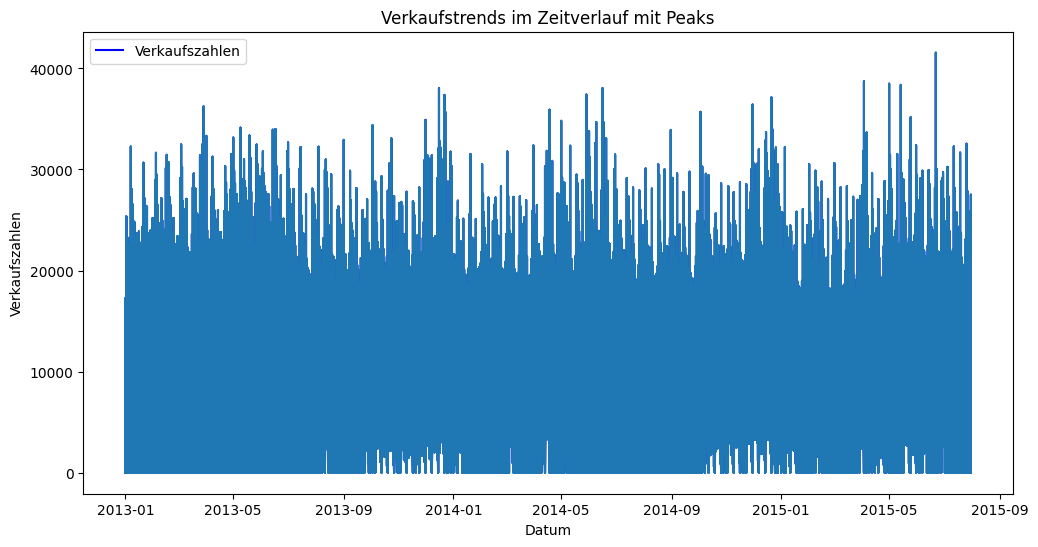

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: Die Spalte 'Date' ist im datetime-Format
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Verkaufstrends im Zeitverlauf plotten
plt.figure(figsize=(12, 6))
plt.plot(df_train['Date'], df_train['Sales'], label='Verkaufszahlen', color='blue')

# Peaks markieren
plt.plot(df_train['Date'], df_train['Sales'])

plt.title('Verkaufstrends im Zeitverlauf mit Peaks')
plt.xlabel('Datum')
plt.ylabel('Verkaufszahlen')
plt.legend()
plt.show()


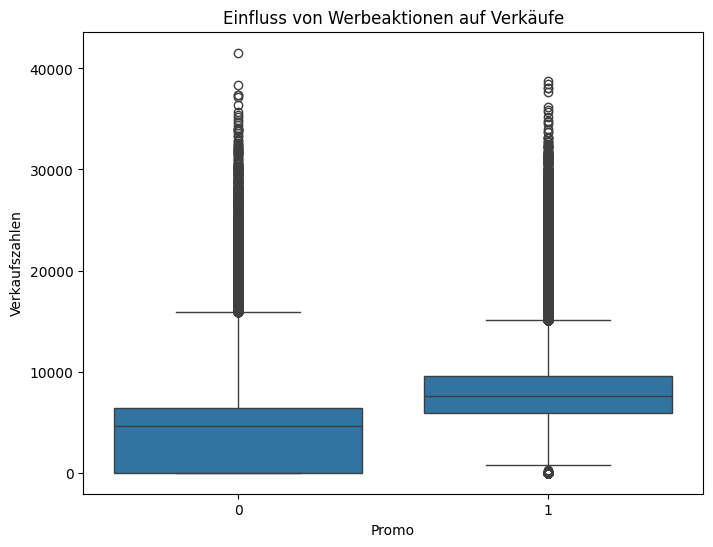

In [10]:
import seaborn as sns

# Boxplot zur Visualisierung des Einflusses von Werbeaktionen auf Verkäufe
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['Promo'], y=df_train['Sales'])
plt.title('Einfluss von Werbeaktionen auf Verkäufe')
plt.xlabel('Promo')
plt.ylabel('Verkaufszahlen')
plt.show()


### Der obige Chart sieht schon mal interessant aus und gibt direkt einen Einblick darauf wie sich Promo Aktionen verhalten. (Behalten wir im Hinterkopf)

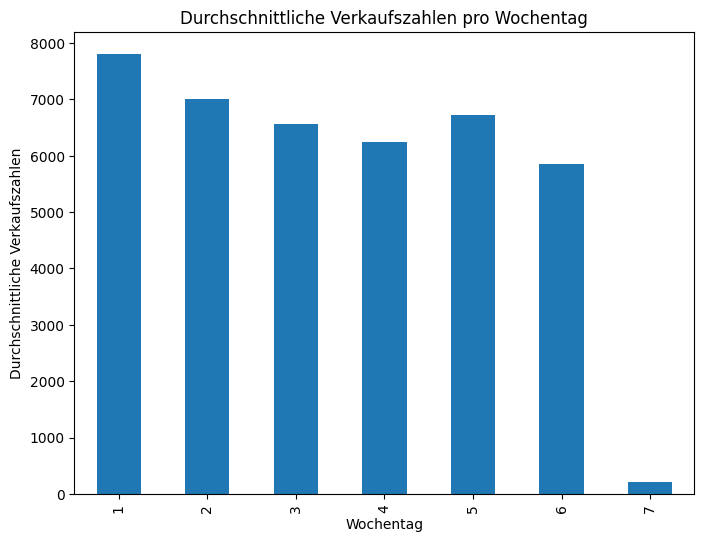

In [11]:
# Durchschnittliche Verkaufszahlen pro Wochentag
average_sales_per_day = df_train.groupby('DayOfWeek')['Sales'].mean()

# Balkendiagramm zur Visualisierung der durchschnittlichen Verkaufszahlen pro Wochentag
plt.figure(figsize=(8, 6))
average_sales_per_day.plot(kind='bar')
plt.title('Durchschnittliche Verkaufszahlen pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittliche Verkaufszahlen')
plt.show()


### Sonntags gibt es wohl auch Verkäufe (Auch interessant sich zu merken)

## Data Cleaning
### Standard Prozeduren, 0 Werte gecheckt, gefüllt oder auch mal gelöscht.

In [12]:
def merge_df(df1, df2, column):
    df_trainstore = pd.merge(df1, df2, on=column)

    return df_trainstore

df_trainstore = merge_df(df_train, df_store, 'Store')

In [13]:
df_trainstore.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [14]:
df_trainstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [15]:
# import datetime
from datetime import datetime

def process_dataframe(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Quarter'] = df['Date'].dt.quarter
    return df

df_trainstore = process_dataframe(df_trainstore)


In [16]:
df_trainstore.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,Week,Quarter
103127,113,1,2013-01-07,10343,898,1,1,0,0,d,...,1999.0,0,NaN,NaN,NaN,7,1,2013,2,1
291566,321,7,2013-11-24,0,0,0,0,0,0,c,...,2013.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",24,11,2013,47,4
172469,191,5,2013-10-04,8819,1048,1,0,0,0,a,...,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",4,10,2013,40,4
405738,445,2,2013-07-23,6675,1232,1,0,0,1,a,...,NaN,0,NaN,NaN,NaN,23,7,2013,30,3
78276,86,2,2013-12-10,4789,658,1,0,0,0,a,...,2005.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",10,12,2013,50,4
295983,326,6,2014-09-13,4569,442,1,0,0,0,d,...,2015.0,1,31.0,2013.0,"Feb,May,Aug,Nov",13,9,2014,37,3
224588,248,7,2015-01-18,0,0,0,0,0,0,a,...,2012.0,1,40.0,2012.0,"Jan,Apr,Jul,Oct",18,1,2015,3,1
166993,185,3,2014-10-15,4837,403,1,0,0,0,d,...,2015.0,0,NaN,NaN,NaN,15,10,2014,42,4
280145,309,7,2014-09-21,0,0,0,0,0,0,d,...,NaN,1,37.0,2009.0,"Feb,May,Aug,Nov",21,9,2014,38,3
512839,563,1,2015-02-02,7008,751,1,1,0,0,a,...,2015.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct",2,2,2015,6,1


In [17]:
import pandas as pd

def preprocess_data(df):
    # One-hot encode categorical variables
    df = pd.get_dummies(df, columns=['StoreType', 'Assortment'])

    # Convert dummies storetype, assortment to int
    df = df.astype({'StoreType_a': 'int', 'StoreType_b': 'int', 'StoreType_c': 'int', 'StoreType_d': 'int'})
    df = df.astype({'Assortment_a': 'int', 'Assortment_b': 'int', 'Assortment_c': 'int'})

    # Map promo interval to numerical
    promo_interval_map = {'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3}
    df['PromoInterval'] = df['PromoInterval'].map(promo_interval_map)

    # If promo2 is 0 then promo2sinceweek, promo2sinceyear, promointerval are 0
    df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)
    df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)
    df['PromoInterval'] = df['PromoInterval'].fillna(0)


    # check for missing values
    df.isnull().sum()
    # Fill missing values with 0
    df.fillna(0, inplace=True)

    return df

df_trainstore = preprocess_data(df_trainstore)


## Feature Engeenering
###### oder auch Kopfschmerzen

### Hier habe ich viel Zeit investiert und mir einige Ideen einfallen lassen, wie ich noch mehr aus den Daten rausholen kann. Dann kam ich auf die Idee, die jeweils letzten 7 Tage immer in betracht zu ziehen, wieviele Kunden es gab / wieviel Sie gekauft hatten etc. 
### Hat auch bis hierhin soweit funktioniert, bis ich dann am Ende bemerkt habe, dass es in der Test.csv gar keine Column für die Customers gibt.

In [18]:
# import pandas as pd

# def process_last_7_days_data(df):
#     df = df.sort_values(by=['Store', 'Date'])

#     # Create a new DataFrame for the last 7 days for each store
#     df_last7days = df.groupby('Store').tail(7)

#     # Create a new DataFrame with the sum of sales and customers for the last 7 days
#     df_last7days_sum = df_last7days.groupby('Store').agg({
#         'Sales': 'sum',
#         'Customers': 'sum'
#     }).reset_index()

#     # Merge the sum data back into the original DataFrame
#     df = pd.merge(df, df_last7days_sum, on='Store', how='left', suffixes=('', '_Last7Days'))

#     # Create new columns
#     df['SalesPerCustomer'] = df['Sales'] / df['Customers']
#     df['SalesLastWeek'] = df['Sales_Last7Days']
#     df['CustomersLastWeek'] = df['Customers_Last7Days']
#     df['SalesPerCustomerLastWeek'] = df['Sales_Last7Days'] / df['Customers_Last7Days']

#     # Drop unnecessary columns
#     df = df.drop(['Sales_Last7Days', 'Customers_Last7Days'], axis=1)

#     return df

# df_trainstore = process_last_7_days_data(df_trainstore)

# drop customers column
df_trainstore = df_trainstore.drop('Customers', axis=1)

In [19]:
# if sales is 0 then sales per customer is 0
#df_trainstore['SalesPerCustomer'] = df_trainstore['SalesPerCustomer'].fillna(0)

df_trainstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   CompetitionDistance        1017209 non-null  float64       
 9   CompetitionOpenSinceMonth  1017209 non-null  float64       
 10  CompetitionOpenSinceYear   1017209 non-null  float64       
 11  Promo2                     1017209 no

In [20]:
# fill na values with 0 for sales per customer last week
#df_trainstore['SalesPerCustomerLastWeek'] = df_trainstore['SalesPerCustomerLastWeek'].fillna(0)

df_trainstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   CompetitionDistance        1017209 non-null  float64       
 9   CompetitionOpenSinceMonth  1017209 non-null  float64       
 10  CompetitionOpenSinceYear   1017209 non-null  float64       
 11  Promo2                     1017209 no

In [21]:
# check for string values
df_trainstore.select_dtypes(include='object')

# replace a string value with a numerical value 1
def dtypes(df):
    df['StateHoliday'] = df['StateHoliday'].replace('a', 1)
    df['StateHoliday'] = df['StateHoliday'].replace('b', 2)
    df['StateHoliday'] = df['StateHoliday'].replace('c', 3)
    df["StateHoliday"] = df["StateHoliday"].astype(int)

    return df

df_trainstore = dtypes(df_trainstore)

In [22]:
# list all dtypes in the dataframe
df_trainstore.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                       float64
Day                                   int32
Month                                 int32
Year                                  int32
Week                                 UInt32
Quarter                               int32
StoreType_a                           int64
StoreType_b                           int64
StoreType_c                     

### Hier wollte ich dann langsam in Richtung Modelle gehen und alles Vorbereiten und hatte auch den StandardScaler benutzt und danach nochmal den Robust Scaler. Ja, ich habe zwei Scaler benutzt gehabt (dafür gibt es keine logische Erklärung). Ich denke das hat mir im Nachhinein auch ziemlich viel kaputt gemacht, besonders weil ich beide Scaler auf alle Daten benutzt habe. Zudem waren die Sales auch nicht logarithmiert, was auch nicht Vorteilhaft war.

In [23]:
# remove date column
df_trainstore = df_trainstore.drop('Date', axis=1)

# use standard scaler to scale the data
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # fit and transform the data
# df_trainstore_scaled = scaler.fit_transform(df_trainstore)

# # convert the scaled data to a DataFrame
# df_trainstore = pd.DataFrame(df_trainstore_scaled, columns=df_trainstore.columns)

# df_trainstore.sample()

KeyboardInterrupt: 

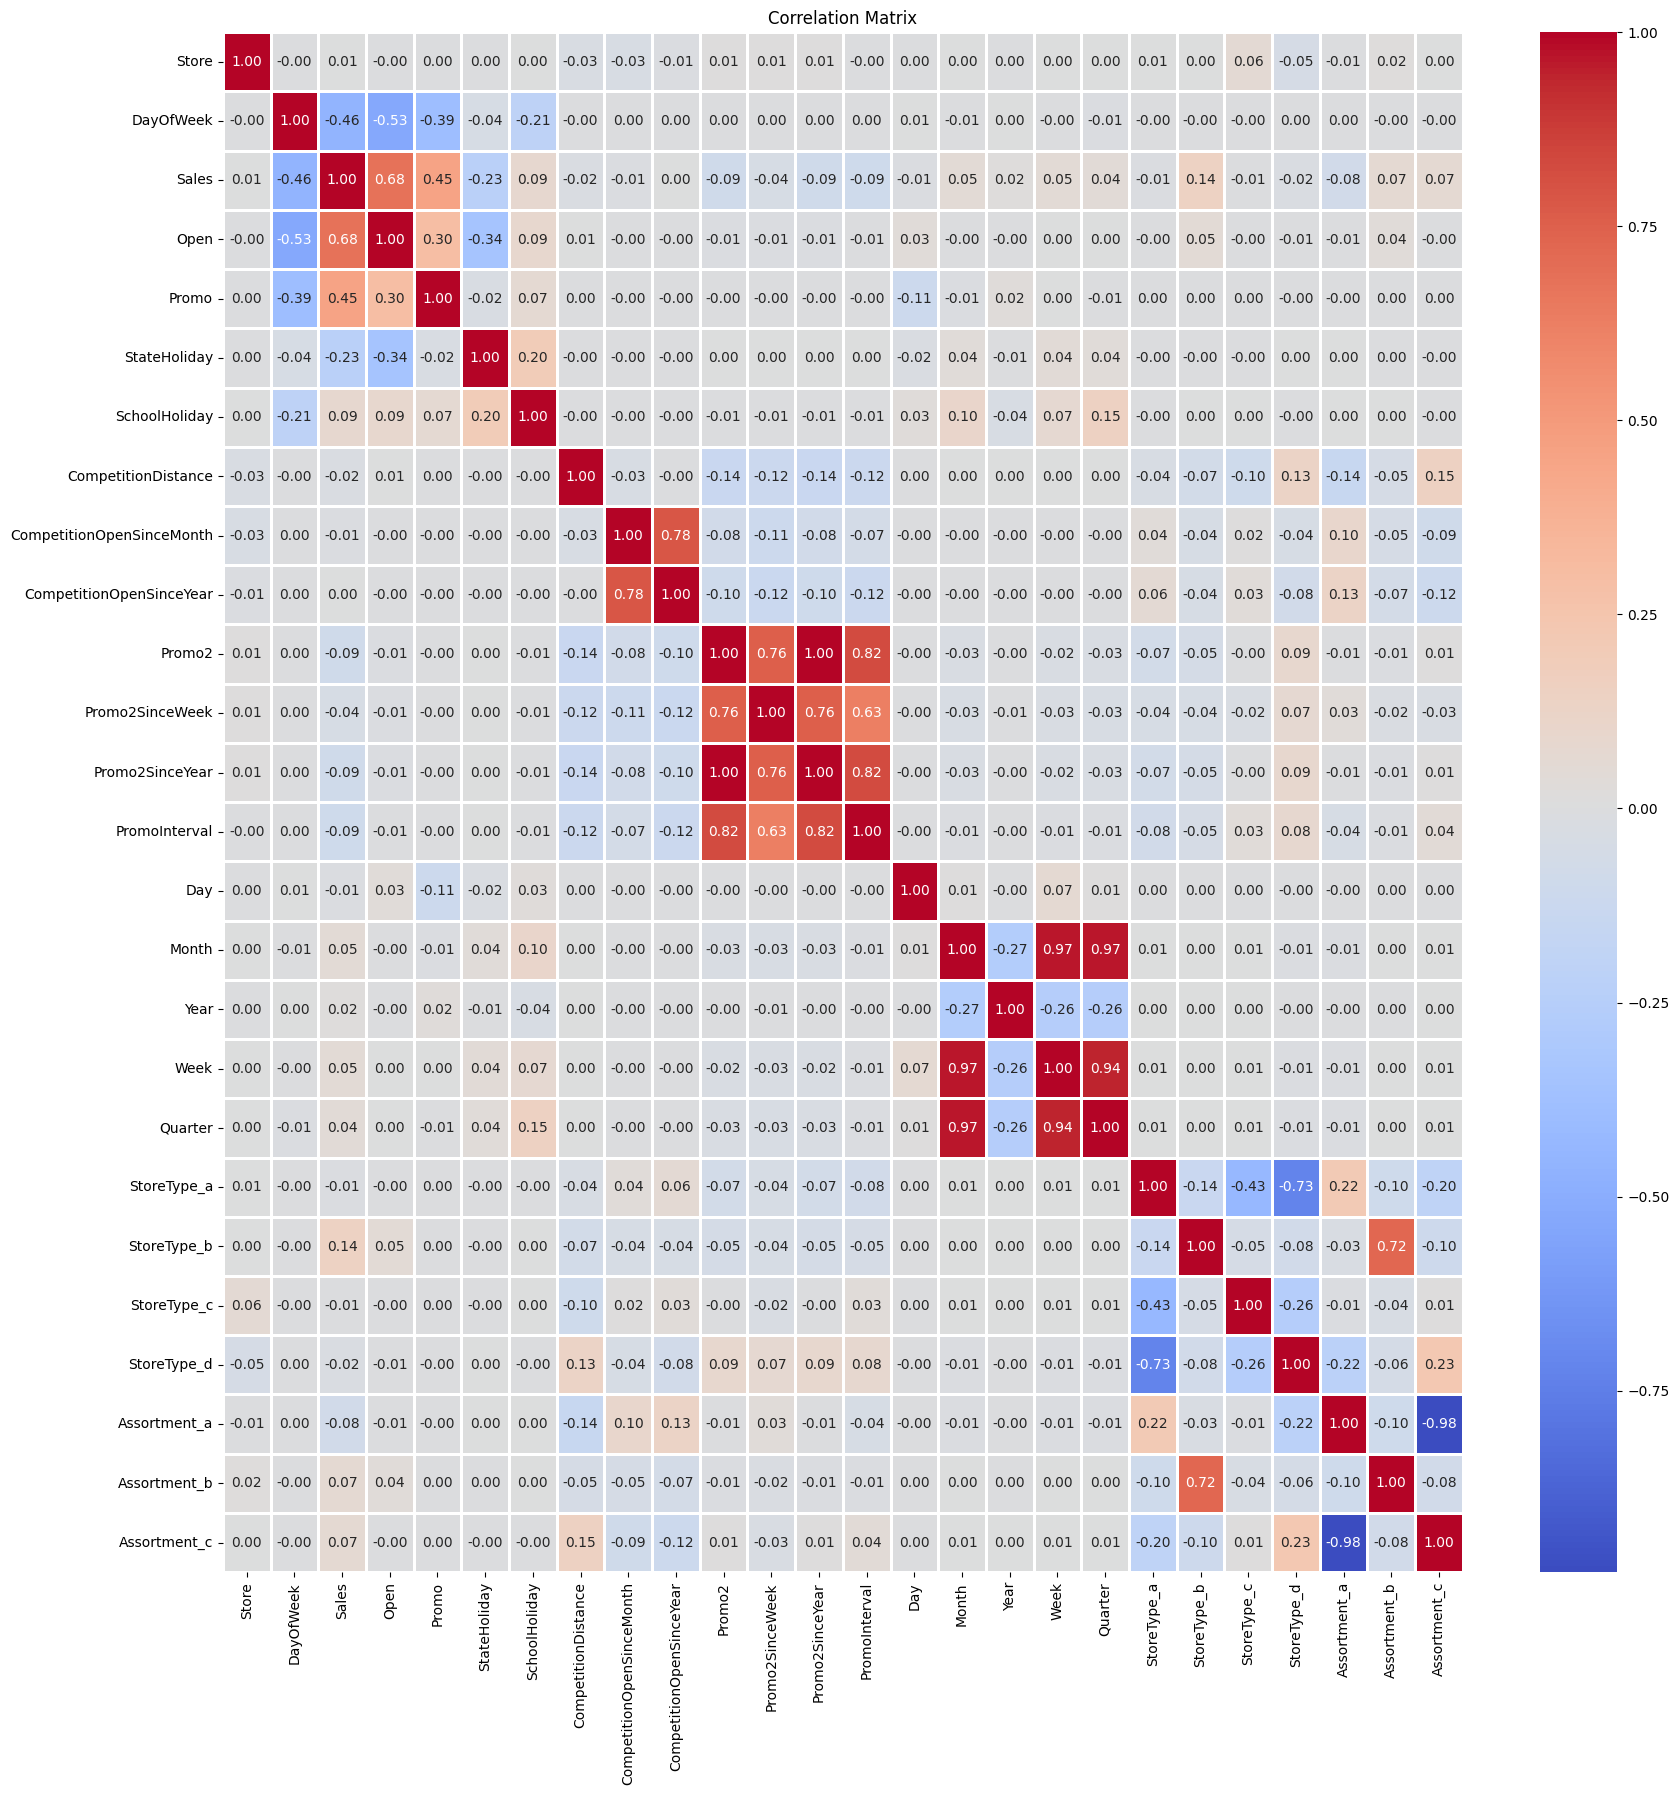

In [ ]:
# plot correlation matrix
plt.figure(figsize=(20, 20))
correlation_matrix = df_trainstore.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()

### Hatte jetzt eine riesige Heatmap, die mir eigentlich gar nicht so viel verraten hat, besonders weil man feature engeenering Spalten fehlen.

### Fehler nach dem Feature Engeenering:
 * Zeitverschwendung aufgrund von nicht Prüfung der Test.csv
 * Keine angepassten Sales
 * Doppelter Scaler

## Train Test Splitt

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

df_trainstore_frac = df_trainstore.sample(frac=0.1, random_state=42)

def split_data(df, test_size=0.2, random_state=42):
     X = df.drop('Sales', axis=1)
     y = df['Sales']
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
     return X_train, X_test, y_train, y_test

# Usage:
X_train, X_test, y_train, y_test = split_data(df_trainstore_frac)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((81376, 25), (20345, 25), (81376,), (20345,))

# Modelle aufziehen

## KNN

In [ ]:
# import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

def knn_regressor(X_train, X_test, y_train, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Assuming you have defined X_train, X_test, y_train somewhere in your code

# Use knn_regressor function to train the model with a specific k value
k_value = 5  # You can choose any k value
knn = knn_regressor(X_train, X_test, y_train, k_value)

# Evaluate the model with rmspe
def rmspe(y_true, y_pred):
    rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return rmspe

y_pred = knn.predict(X_test)
rmspe_knn = rmspe(y_test, y_pred)
print('RMSPE: ', rmspe_knn)

# Use knn_regressor function to train the model with different k values and plot the rmspe
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
rmspe_values = []

for k in k_values:
    knn = knn_regressor(X_train, X_test, y_train, k)
    y_pred = knn.predict(X_test)
    rmspe_knn = rmspe(y_test, y_pred)
    rmspe_values.append(rmspe_knn)

plt.figure(figsize=(8, 6))
plt.plot(k_values, rmspe_values, marker='o', linestyle='--', color='b')
plt.title('RMSPE vs. k')
plt.xlabel('k')
plt.ylabel('RMSPE')
plt.show()

# get the best k value
best_k = k_values[np.argmin(rmspe_values)]
print('Best k: ', best_k)
print('Lowest RMSPE: ', min(rmspe_values))

def rmspe_percentage(y_true, y_pred):
    rmspe = np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))
    rmspe_percent = rmspe * 100
    return rmspe_percent

# Berechnen Sie den RMSPE in Prozent für Ihre Daten
rmspe_percent = rmspe_percentage(y_test, y_pred)
print("RMSPE in Prozent:", rmspe_percent)

RMSPE:  inf


KeyboardInterrupt: 

## RF Regressor

In [ ]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(X_train, X_test, y_train, n_estimators, max_depth, min_samples_split, min_samples_leaf):
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    rf.fit(X_train, y_train)
    return rf

# use random_forest_regressor function to find best n_estimators, max_depth, min_samples_split, and min_samples_leaf
n_estimators = [10, 30]
max_depth = [10, 30]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8, 10]

rmspe_values = []

for n in n_estimators:
    print('n_estimators: ', n)
    for m in max_depth:
        print('max_depth: ', m)
        for s in min_samples_split:
            for l in min_samples_leaf:
                rf = random_forest_regressor(X_train, X_test, y_train, n, m, s, l)
                y_pred = rf.predict(X_test)
                rmspe_rf = rmspe(y_test, y_pred)
                rmspe_values.append(rmspe_rf)

# get the best n_estimators, max_depth, min_samples_split, and min_samples_leaf
best_params = np.argmin(rmspe_values)

# 

n_estimators:  10
max_depth:  10


max_depth:  30


KeyboardInterrupt: 

In [ ]:
best_params = np.argmin(rmspe_values)

# get the best n_estimators, max_depth, min_samples_split, and min_samples_leaf
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(min_samples_split) * len(min_samples_leaf))]
best_max_depth = max_depth[(best_params // (len(min_samples_split) * len(min_samples_leaf))) % len(max_depth)]
best_min_samples_split = min_samples_split[(best_params // len(min_samples_leaf)) % len(min_samples_split)]
best_min_samples_leaf = min_samples_leaf[best_params % len(min_samples_leaf)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best min_samples_leaf: ', best_min_samples_leaf)

# get lowest rmspe value
lowest_rmspe_rf = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_rf)


Best n_estimators:  30
Best max_depth:  30
Best min_samples_split:  2
Best min_samples_leaf:  1
Lowest RMSPE:  0.36752261203409126


## XGBoost

In [ ]:
# xgboost regressor
from xgboost import XGBRegressor

def xgboost_regressor(X_train, X_test, y_train, n_estimators, max_depth, learning_rate):
    xgb = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    xgb.fit(X_train, y_train)
    return xgb

# use xgboost_regressor function to find best n_estimators, max_depth, and learning_rate
n_estimators = [100, 200, 300, 400, 500]
max_depth = [3, 5, 7, 9]
learning_rate = [0.01, 0.05, 0.1, 0.5]

rmspe_values = []

for n in n_estimators:
    for m in max_depth:
        for l in learning_rate:
            xgb = xgboost_regressor(X_train, X_test, y_train, n, m, l)
            y_pred = xgb.predict(X_test)
            rmspe_xgb = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_xgb)

# get the best n_estimators, max_depth, and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(learning_rate))]
best_max_depth = max_depth[(best_params // len(learning_rate)) % len(max_depth)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe_xg = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_xg)

Best n_estimators:  100
Best max_depth:  3
Best learning_rate:  0.01
Lowest RMSPE:  inf


## LightGBM

In [ ]:
# import LightGBM
from lightgbm import LGBMRegressor

def lightgbm_regressor(X_train, X_test, y_train, n_estimators, max_depth, learning_rate):
    lgbm = LGBMRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    lgbm.fit(X_train, y_train)
    return lgbm

# use lightgbm_regressor function to find best n_estimators, max_depth, and learning_rate
n_estimators = [100, 200, 300, 400, 500]
max_depth = [3, 5, 7, 9]
learning_rate = [0.01, 0.05, 0.1, 0.5]

rmspe_values = []

for n in n_estimators:
    for m in max_depth:
        for l in learning_rate:
            lgbm = lightgbm_regressor(X_train, X_test, y_train, n, m, l)
            y_pred = lgbm.predict(X_test)
            rmspe_lgbm = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_lgbm)

# get the best n_estimators, max_depth, and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(learning_rate))]
best_max_depth = max_depth[(best_params // len(learning_rate)) % len(max_depth)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe_lightgbm = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_lightgbm)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 4068, number of used features: 25
[LightGBM] [Info] Start training from score 5742.527040
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

KeyboardInterrupt: 

## Decision Tree

In [ ]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regressor(X_train, X_test, y_train, max_depth, min_samples_split, min_samples_leaf):
    dt = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    return dt

# use decision_tree_regressor function to find best max_depth, min_samples_split, and min_samples_leaf

max_depth = [10, 30, 50, 70]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

rmspe_values = []

for m in max_depth:
    print('max_depth: ', m)
    for s in min_samples_split:
        for l in min_samples_leaf:
            dt = decision_tree_regressor(X_train, X_test, y_train, m, s, l)
            y_pred = dt.predict(X_test)
            rmspe_dt = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_dt)

# get the best max_depth, min_samples_split, and min_samples_leaf
best_params = np.argmin(rmspe_values)
best_max_depth = max_depth[(best_params // (len(min_samples_split) * len(min_samples_leaf))) % len(max_depth)]
best_min_samples_split = min_samples_split[(best_params // len(min_samples_leaf)) % len(min_samples_split)]
best_min_samples_leaf = min_samples_leaf[best_params % len(min_samples_leaf)]

print('Best max_depth: ', best_max_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best min_samples_leaf: ', best_min_samples_leaf)

# get lowest rmspe value
lowest_rmspe_dt = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_dt)

max_depth:  10
max_depth:  30
max_depth:  50
max_depth:  70
Best max_depth:  10
Best min_samples_split:  5
Best min_samples_leaf:  2
Lowest RMSPE:  21.84200931666863


## AdaBoost

In [ ]:
# ada boost regressor
from sklearn.ensemble import AdaBoostRegressor

def ada_boost_regressor(X_train, X_test, y_train, n_estimators, learning_rate):
    ada = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    ada.fit(X_train, y_train)
    return ada

# use ada_boost_regressor function to find best n_estimators and learning_rate
n_estimators = [50, 100, 150, 200]
learning_rate = [0.1, 0.5, 1.0]

rmspe_values = []

for n in n_estimators:
    print('n_estimators: ', n)
    for l in learning_rate:
        ada = ada_boost_regressor(X_train, X_test, y_train, n, l)
        y_pred = ada.predict(X_test)
        rmspe_ada = rmspe(y_test, y_pred)
        rmspe_values.append(rmspe_ada)

# get the best n_estimators and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // len(learning_rate)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe_ada = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_ada)

n_estimators:  50
n_estimators:  100
n_estimators:  150
n_estimators:  200
Best n_estimators:  100
Best learning_rate:  0.1
Lowest RMSPE:  115.46583794392161


## SVR

In [ ]:
# support vector regressor
from sklearn.svm import SVR

def svr_regressor(X_train, X_test, y_train, kernel, C, epsilon):
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X_train, y_train)
    return svr

# use svr_regressor function to find best kernel, C, and epsilon
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.1, 1, 10]
epsilon = [0.1, 0.5, 1.0]

rmspe_values = []

for k in kernel:
    print('kernel: ', k)
    for c in C:
        for e in epsilon:
            svr = svr_regressor(X_train, X_test, y_train, k, c, e)
            y_pred = svr.predict(X_test)
            rmspe_svr = rmspe(y_test, y_pred)
            rmspe_values.append(rmspe_svr)

# get the best kernel, C, and epsilon
best_params = np.argmin(rmspe_values)
best_kernel = kernel[best_params // (len(C) * len(epsilon))]
best_C = C[(best_params // len(epsilon)) % len(C)]
best_epsilon = epsilon[best_params % len(epsilon)]

print('Best kernel: ', best_kernel)
print('Best C: ', best_C)
print('Best epsilon: ', best_epsilon)

# get lowest rmspe value
lowest_rmspe_svr = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_svr)

kernel:  linear
kernel:  poly
kernel:  rbf
kernel:  sigmoid
Best kernel:  poly
Best C:  0.1
Best epsilon:  0.1
Lowest RMSPE:  23.9890969228657


## LinearSVR

In [ ]:
# svm regressor
from sklearn.svm import LinearSVR

def linear_svr_regressor(X_train, X_test, y_train, C, epsilon):
    lsvr = LinearSVR(C=C, epsilon=epsilon)
    lsvr.fit(X_train, y_train)
    return lsvr

# use linear_svr_regressor function to find best C and epsilon

C = [0.1, 0.5, 1, 10, 20]
epsilon = [0.1, 0.5, 1.0, 1.5, 2.0]

rmspe_values = []

for c in C:
    for e in epsilon:
        lsvr = linear_svr_regressor(X_train, X_test, y_train, c, e)
        y_pred = lsvr.predict(X_test)
        rmspe_lsvr = rmspe(y_test, y_pred)
        rmspe_values.append(rmspe_lsvr)

# get the best C and epsilon
best_params = np.argmin(rmspe_values)
best_C = C[best_params // len(epsilon)]
best_epsilon = epsilon[best_params % len(epsilon)]

print('Best C: ', best_C)
print('Best epsilon: ', best_epsilon)

# get lowest rmspe value
lowest_rmspe_linearsvr = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_linearsvr)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/l

Best C:  1
Best epsilon:  0.1
Lowest RMSPE:  54.82485938074911


/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number o

## LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

def linear_regression(X_train, X_test, y_train):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr

# Use linear_regression function to train the model
lr = linear_regression(X_train, X_test, y_train)

# Evaluate the model with RMSPE
y_pred = lr.predict(X_test)
rmspe_lr = rmspe(y_test, y_pred)
print('RMSPE:', rmspe_lr)


RMSPE: 63.819122442739406


## GradientBoosting

In [ ]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

def gradient_boosting_regressor(X_train, X_test, y_train, n_estimators, max_depth, min_samples_split, min_samples_leaf, learning_rate):
    gb = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, learning_rate=learning_rate, random_state=42)
    gb.fit(X_train, y_train)
    return gb

# use gradient_boosting_regressor function to find best n_estimators, max_depth, min_samples_split, min_samples_leaf, and learning_rate
n_estimators = [200]
max_depth = [3, 5, 7]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
learning_rate = [0.1, 0.5, 1.0]

rmspe_values = []

for n in n_estimators:
    print('n_estimators: ', n)
    for m in max_depth:
        print('max_depth: ', m)
        for s in min_samples_split:
            for l in min_samples_leaf:
                for lr in learning_rate:
                    gb = gradient_boosting_regressor(X_train, X_test, y_train, n, m, s, l, lr)
                    y_pred = gb.predict(X_test)
                    rmspe_gb = rmspe(y_test, y_pred)
                    rmspe_values.append(rmspe_gb)

# get the best n_estimators, max_depth, min_samples_split, min_samples_leaf, and learning_rate
best_params = np.argmin(rmspe_values)
best_n_estimators = n_estimators[best_params // (len(max_depth) * len(min_samples_split) * len(min_samples_leaf) * len(learning_rate))]
best_max_depth = max_depth[(best_params // (len(min_samples_split) * len(min_samples_leaf) * len(learning_rate))) % len(max_depth)]
best_min_samples_split = min_samples_split[(best_params // (len(min_samples_leaf) * len(learning_rate))) % len(min_samples_split)]
best_min_samples_leaf = min_samples_leaf[(best_params // len(learning_rate)) % len(min_samples_leaf)]
best_learning_rate = learning_rate[best_params % len(learning_rate)]

print('Best n_estimators: ', best_n_estimators)
print('Best max_depth: ', best_max_depth)
print('Best min_samples_split: ', best_min_samples_split)
print('Best min_samples_leaf: ', best_min_samples_leaf)
print('Best learning_rate: ', best_learning_rate)

# get lowest rmspe value
lowest_rmspe_gradientboosting = np.min(rmspe_values)
print('Lowest RMSPE: ', lowest_rmspe_gradientboosting)


n_estimators:  200
max_depth:  3
max_depth:  5
max_depth:  7
Best n_estimators:  200
Best max_depth:  3
Best min_samples_split:  2
Best min_samples_leaf:  2
Best learning_rate:  0.5
Lowest RMSPE:  8.060281525917004


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# best gradient boosting regressor
gb = GradientBoostingRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, learning_rate=best_learning_rate, random_state=42)
gb.fit(X_train, y_train)

# Evaluate the model with RMSPE
y_pred = gb.predict(X_test)
rmspe_gb = rmspe(y_test, y_pred)
print('RMSPE:', rmspe_gb)

RMSPE: 8.060281525917004


### Hier habe ich dann meine ersten Erkenntnisse gesammelt, um meine Modelle zu vergleichen. Hierfür habe ich den RMSPE benutzt. Beim erstellen ist mir schon aufgefallen, dass die Bearbeitung leichter gewesen wäre, als Funktion die man aufruft, anstatt sehr viel hoch und runter zu swipen. Nachdem ich meine falschen Spalten entfernt habe, haben sich die Ergebnisse drastisch verschlechtert.

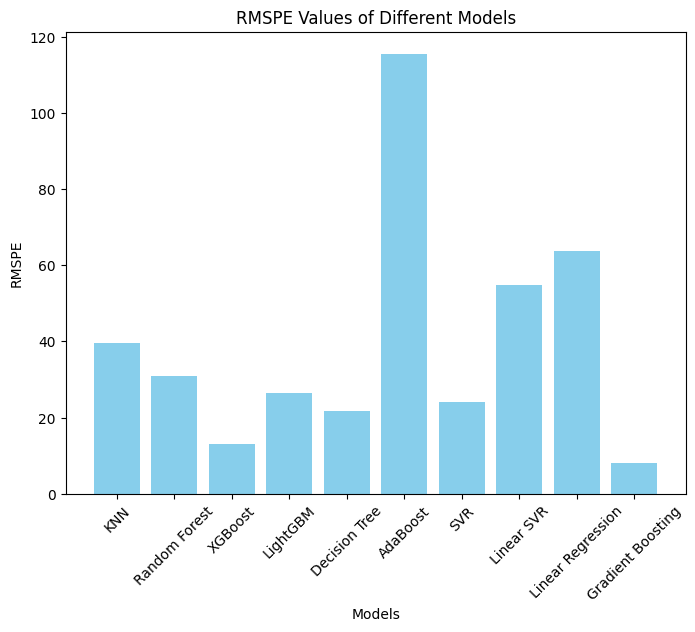

In [ ]:
# get the best models and their RMSPE values
models = ['KNN', 'Random Forest', 'XGBoost', 'LightGBM', 'Decision Tree', 'AdaBoost', 'SVR', 'Linear SVR', 'Linear Regression', 'Gradient Boosting']
rmspe_values = [rmspe_knn, lowest_rmspe_rf, lowest_rmspe_xg, lowest_rmspe_lightgbm, lowest_rmspe_dt, lowest_rmspe_ada, lowest_rmspe_svr, lowest_rmspe_linearsvr, rmspe_lr, lowest_rmspe_gradientboosting]

best_model = models[np.argmin(rmspe_values)]
lowest_rmspe = np.min(rmspe_values)

# chart the best model and its RMSPE value
plt.figure(figsize=(8, 6))
plt.bar(models, rmspe_values, color='skyblue')
plt.title('RMSPE Values of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSPE')
plt.xticks(rotation=45)
plt.show()


### AdaBoost, Linear SVR und Linear Regression sind hierbei noch die schlechtesten. XGBoost und Gradient Boosting sind die einzigen mit einem halbwegs guten Scoring

## Neuronale Netze
### Ich hatte 2 Ideen für Neuronale Netze, zum einen wollte ich den MLP Regressor ausprobieren aus der SciKit-Learn libary und zum anderen die mir eher bekanntere Version. Jedoch habe ich beide Versionen nicht zum laufen bekommen. Der MLPRegressor hat gar keinen Output gegeben und nur Zeit gefressen, wenn er mal nicht den Kernel zum abstürzen gebracht hat. 

In [ ]:
# # neural network regressor
# from sklearn.neural_network import MLPRegressor

# def neural_network_regressor(X_train, X_test, y_train, hidden_layer_sizes, activation, solver, alpha, learning_rate):
#     nn = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate=learning_rate, random_state=42)
#     nn.fit(X_train, y_train)
#     return nn

# # use neural_network_regressor function to find best hidden_layer_sizes, activation, solver, alpha, and learning_rate
# hidden_layer_sizes = [(100,), (200,)]
# activation = ['identity', 'logistic', 'tanh', 'relu']
# solver = ['sgd', 'adam']
# alpha = [0.001, 0.01, 0.1]
# learning_rate = ['constant', 'invscaling', 'adaptive']

# rmspe_values = []

# for h in hidden_layer_sizes:
#     for a in activation:
#         for s in solver:
#             for al in alpha:
#                 for l in learning_rate:
#                     nn = neural_network_regressor(X_train, X_test, y_train, h, a, s, al, l)
#                     y_pred = nn.predict(X_test)
#                     rmspe_nn = rmspe(y_test, y_pred)
#                     rmspe_values.append(rmspe_nn)

# # get the best hidden_layer_sizes, activation, solver, alpha, and learning_rate
# best_params = np.argmin(rmspe_values)
# best_hidden_layer_sizes = hidden_layer_sizes[best_params // (len(activation) * len(solver) * len(alpha) * len(learning_rate))]
# best_activation = activation[(best_params // (len(solver) * len(alpha) * len(learning_rate))) % len(activation)]
# best_solver = solver[(best_params // (len(alpha) * len(learning_rate)) % len(solver))]
# best_alpha = alpha[(best_params // len(learning_rate)) % len(alpha)]
# best_learning_rate = learning_rate[best_params % len(learning_rate)]

# print('Best hidden_layer_sizes: ', best_hidden_layer_sizes)
# print('Best activation: ', best_activation)
# print('Best solver: ', best_solver)
# print('Best alpha: ', best_alpha)
# print('Best learning_rate: ', best_learning_rate)

# # get lowest rmspe value
# lowest_rmspe_nn = np.min(rmspe_values)
# print('Lowest RMSPE: ', lowest_rmspe_nn)

### Diese Version vom Neuronalen Netz, hat mich leider auch nicht weiter gebracht. Es gab keine Fortschritte und das Netz ist andauernd gestorben, weshalb ich es auch ruhen lassen habe.

In [ ]:
# import torch
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

# # Assuming df_trainstore and other variables are properly defined

# # Convert data to PyTorch tensors
# x_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
# x_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# # Define RMSPE function
# def rmspe(y_true, y_pred):
#     percentage_error = ((y_true - y_pred) / y_true) ** 2
#     return torch.sqrt(torch.mean(percentage_error))

# # Define function to get batch data
# def get_batch(x, y, batch_size):
#     for i in range(0, len(x), batch_size):
#         yield x[i:i+batch_size], y[i:i+batch_size]

# # Define neural network model
# class MyModel(torch.nn.Module):
#     def __init__(self):
#         super(MyModel, self).__init__()
#         self.fc1 = torch.nn.Linear(30, 15)
#         self.fc2 = torch.nn.Linear(15, 1)
#         self.batch_norm = torch.nn.BatchNorm1d(15)
#         self.relu = torch.nn.ReLU()

#     def forward(self, xb):
#         xb = self.relu(self.fc1(xb))
#         xb = self.batch_norm(xb)
#         xb = self.fc2(xb)
#         return xb

# # Set hyperparameters
# lr = 0.001
# batch_size = 15
# epochs = 50

# # Initialize model and optimizer
# model = MyModel()
# optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# losses = []
# rmspe_test = []

# # Training loop
# for epoch in range(epochs):
#     losses_in_epoch = []
#     for xb, yb in get_batch(x_train_tensor, y_train_tensor, batch_size):
#         optimizer.zero_grad()
#         y_pred = model(xb)
#         loss = rmspe(y_pred, yb)
#         loss.backward()
#         optimizer.step()
#         losses_in_epoch.append(loss.item())
    
#     # Compute average loss for the epoch
#     epoch_loss = sum(losses_in_epoch) / len(losses_in_epoch)
#     losses.append(epoch_loss)
    
#     # Compute RMSPE on test data
#     with torch.no_grad():
#         y_test_hat = model(x_test_tensor)
#         epoch_rmspe_test = rmspe(y_test_hat, y_test_tensor)
#         rmspe_test.append(epoch_rmspe_test.item())

#     print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, RMSPE on Test Data: {epoch_rmspe_test:.4f}")

# # Plotting
# plt.plot(range(epochs), losses, color="blue")
# plt.plot(range(epochs), rmspe_test, color="red")
# plt.legend(["loss", "rmspe_test"])
# plt.xlabel("Epoch")
# plt.ylabel("Loss/RMSPE")
# plt.title("Training Loss and RMSPE on Test Data")
# plt.show()


## Optimierung der "guten" Modelle mit GridsearchCV

In [ ]:
# optimzie best models with grid search startig with random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 30, 50, 70],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print('Best Parameters for Random Forest: ', best_params_rf)

# Get the best model
best_model_rf = grid_search_rf.best_estimator_
print('Best Model for Random Forest: ', best_model_rf)

# Evaluate the best model
y_pred_rf = best_model_rf.predict(X_test)
rmspe_rf = rmspe(y_test, y_pred_rf)
print('RMSPE for Random Forest: ', rmspe_rf)
print("Accuracy: ", best_model_rf.score(X_test, y_test))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.4s


In [ ]:
# optimize xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# import rmspe
def rmspe(y_true, y_pred):
    rmspe = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return rmspe

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

# Initialize the model
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print('Best Parameters for XGBoost: ', best_params_xgb)

# Get the best model
best_model_xgb = grid_search_xgb.best_estimator_
print('Best Model for XGBoost: ', best_model_xgb)

# Evaluate the best model
y_pred_xgb = best_model_xgb.predict(X_test)
rmspe_xgb = rmspe(y_test, y_pred_xgb)
print('RMSPE for XGBoost: ', rmspe_xgb)
print("Accuracy: ", best_model_xgb.score(X_test, y_test))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.6s
[CV] END ..learning_rate=0.0

/home/codespace/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=500; total time=   8.1s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=500; total time=   8.2s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=200; total time=   1.1s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=200; total time=   1.1s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=200; total time=   1.0s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=200; total time=   1.0s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=200; total time=   1.0s
[CV] END ...learning_rate=0.

### Alle Modelle haben sich mit GridSearchCV tendenziell verschlechtert, wenn man sich auf die RMSPE Werte bezieht. Erklären kann ich es mir aber nicht, da beide Methoden, den gleichen Parameterbereich erhielten. 

In [ ]:
# optimize gradient boosting regressor with grid search
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Initialize the model
gb = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_
print('Best Parameters for Gradient Boosting: ', best_params_gb)

# Get the best model
best_model_gb = grid_search_gb.best_estimator_
print('Best Model for Gradient Boosting: ', best_model_gb)

# Evaluate the best model
y_pred_gb = best_model_gb.predict(X_test)
rmspe_gb = rmspe(y_test, y_pred_gb)
print('RMSPE for Gradient Boosting: ', rmspe_gb)
print("Accuracy: ", best_model_gb.score(X_test, y_test))



Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total tim

#### War nur ein Test, ob das schlechteste Modell mit GridSeachCV vielleicht doch etwas reißen kann

In [ ]:
# # # optimize worst model with grid search
# # from sklearn.model_selection import GridSearchCV
# # from sklearn.svm import LinearSVR

# # # Define the parameter grid
# # param_grid = {
# #     'C': [0.1, 0.5, 1, 10, 20],
# #     'epsilon': [0.1, 0.5, 1.0, 1.5, 2.0]
# # }

# # # Initialize the model
# # lsvr = LinearSVR(random_state=42)

# # # Initialize GridSearchCV
# # grid_search_lsvr = GridSearchCV(estimator=lsvr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # # Fit the model
# # grid_search_lsvr.fit(X_train, y_train)

# # # Get the best parameters
# # best_params_lsvr = grid_search_lsvr.best_params_
# # print('Best Parameters for Linear SVR: ', best_params_lsvr)

# # # Get the best model
# # best_model_lsvr = grid_search_lsvr.best_estimator_
# # print('Best Model for Linear SVR: ', best_model_lsvr)

# # # Evaluate the best model
# # y_pred_lsvr = best_model_lsvr.predict(X_test)
# # rmspe_lsvr = rmspe(y_test, y_pred_lsvr)
# # print('RMSPE for Linear SVR: ', rmspe_lsvr)
# # print("Accuracy: ", best_model_lsvr.score(X_test, y_test))



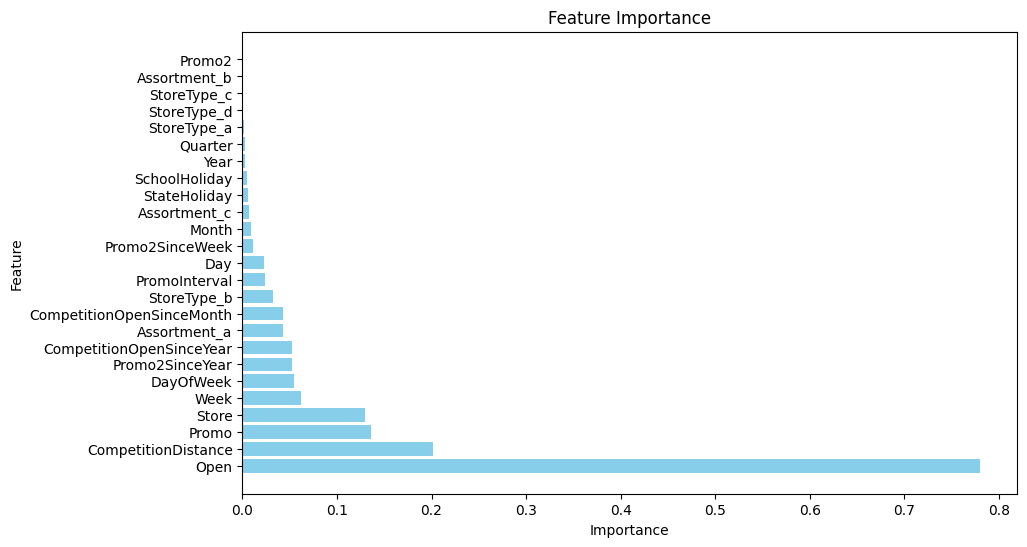

In [ ]:
# permuation feature importance
from sklearn.inspection import permutation_importance

# Get the permutation importance
perm_importance = permutation_importance(best_model_gb, X_test, y_test, n_repeats=10, random_state=42)

# Get the feature importance
feature_importance = perm_importance.importances_mean

# Get the feature names
feature_names = X_test.columns

# Create a DataFrame
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



### Feature Importance
#### Hier kann man nochmal sehen, dass die Promo eines der Top 3 Features ist, um die Sales zu predicten

In [ ]:
# ensemble model
from sklearn.ensemble import VotingRegressor

# Initialize the ensemble model
ensemble_model = VotingRegressor(estimators=[
    #('Random Forest', best_model_rf),
    ('XGBoost', best_model_xgb),
    ('Gradient Boosting', best_model_gb),
    #('Linear SVR', best_model_lsvr)
])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
rmspe_ensemble = rmspe(y_test, y_pred_ensemble)
print('RMSPE for Ensemble Model: ', rmspe_ensemble)



RMSPE for Ensemble Model:  inf


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4068 entries, 21301 to 729989
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      4068 non-null   int64  
 1   DayOfWeek                  4068 non-null   int64  
 2   Open                       4068 non-null   int64  
 3   Promo                      4068 non-null   int64  
 4   StateHoliday               4068 non-null   int64  
 5   SchoolHoliday              4068 non-null   int64  
 6   CompetitionDistance        4068 non-null   float64
 7   CompetitionOpenSinceMonth  4068 non-null   float64
 8   CompetitionOpenSinceYear   4068 non-null   float64
 9   Promo2                     4068 non-null   int64  
 10  Promo2SinceWeek            4068 non-null   float64
 11  Promo2SinceYear            4068 non-null   float64
 12  PromoInterval              4068 non-null   float64
 13  Day                        4068 non-null   int3

In [ ]:
# all column names
df_trainstore.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year', 'Week',
       'Quarter', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

## Test.csv benutzen um nun Sales zu predicten für Kaggle

In [ ]:
# import the test data
df_test = pd.read_csv('data/test.csv')

#merge the data
df_teststore = merge_df(df_test, df_store, 'Store')

# process the data
df_teststore = process_dataframe(df_teststore)

# preprocess the data
df_teststore = preprocess_data(df_teststore)

# process the last 7 days data
# df_teststore = process_last_7_days_data(df_teststore)
# Hier habe ich erst realisiert, das es in den den Testdaten keine Spalten für Customers gibt. 
# Daher habe ich mich entschieden, die Spalten Customers_Last7Days zu entfernen, obwohl ich sie in den Trainingsdaten verwendet habe 
# und sie auch meiner Meinung nach wichtig sind.

# dtypes
df_teststore = dtypes(df_teststore)

df_teststore.info()

# drop date column for df_teststore
df_teststore = df_teststore.drop('Date', axis=1)
df_teststore = df_teststore.drop('Id', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41088 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  int64         
 7   SchoolHoliday              41088 non-null  int64         
 8   CompetitionDistance        41088 non-null  float64       
 9   CompetitionOpenSinceMonth  41088 non-null  float64       
 10  CompetitionOpenSinceYear   41088 non-null  float64       
 11  Promo2                     41088 non-null  int64         
 12  Prom

### Ich hatte hier sehr lange das Problem, das ich die Daten zuerst noch mit dem doppelten Scaler formatiert habe, und sie auch formatiert zurückerhalten habe. Diese Daten habe ich nicht geschafft zurück zu skalieren in Ihren Ursprung. Dadurch habe ich oft Gelöscht und wieder neu geschrieben und meine Variablen Überspeichert. Hier ist der Zeitpunkt, wo ich mir sehr viel Zerschossen habe und meine größten Probleme erst gekommen sind: Spalten sind verschwunden, Modelle liefen nicht, Kernel nach Kernel ist abgestürzt.

In [ ]:
# test data with rf model
y_pred_rf_test = best_model_rf.predict(df_teststore)

# create a DataFrame for the submission
df_submission_rf = pd.DataFrame({
    'Id': df_test['Id'],
    'Sales': y_pred_rf_test
})

# save the submission
df_submission_rf.to_csv('submission_rf.csv', index=False)

# test data with xgboost model
y_pred_xgb_test = best_model_xgb.predict(df_teststore)

# create a DataFrame for the submission
df_submission_xgb = pd.DataFrame({
    'Id': df_test['Id'],
    'Sales': y_pred_xgb_test
})

# save the submission
df_submission_xgb.to_csv('submission_xgb2.csv', index=False)

### Irgendwie habe ich es geschafft noch ein paar CSVs zu kriegen, aber die Qualität war nicht für mich zufriedendstellend.

## Charts
### Damit die Charts zumindest funktionieren, habe ich mich entschieden die Daten einmal komplett neuzuladen und meine erkenntnisse aus den vorherigen Kapitel zu verfolgen.

In [27]:
# import new train data
df_train_new = pd.read_csv('data/train.csv')

# merge the new train data with the store data
df_trainstore_new = merge_df(df_train_new, df_store, 'Store')

df_trainstore_new.head()

df = df_trainstore_new.sort_values(by=['Store', 'Date'])

# Create a new DataFrame for the last 7 days for each store
df_last7days = df.groupby('Store').tail(7)

# Create a new DataFrame with the sum of sales and customers for the last 7 days
df_last7days_sum = df_last7days.groupby('Store').agg({
    'Sales': 'sum',
    'Customers': 'sum'
}).reset_index()

# Merge the sum data back into the original DataFrame
df = pd.merge(df, df_last7days_sum, on='Store', how='left', suffixes=('', '_Last7Days'))

# Create new columns
df['SalesPerCustomer'] = df['Sales'] / df['Customers']
df['SalesLastWeek'] = df['Sales_Last7Days']
df['CustomersLastWeek'] = df['Customers_Last7Days']
df['SalesPerCustomerLastWeek'] = df['Sales_Last7Days'] / df['Customers_Last7Days']

# Drop unnecessary columns
df = df.drop(['Sales_Last7Days', 'Customers_Last7Days'], axis=1)

df.columns

/tmp/ipykernel_58414/426869092.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_new = pd.read_csv('data/train.csv')


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'SalesPerCustomer', 'SalesLastWeek',
       'CustomersLastWeek', 'SalesPerCustomerLastWeek'],
      dtype='object')

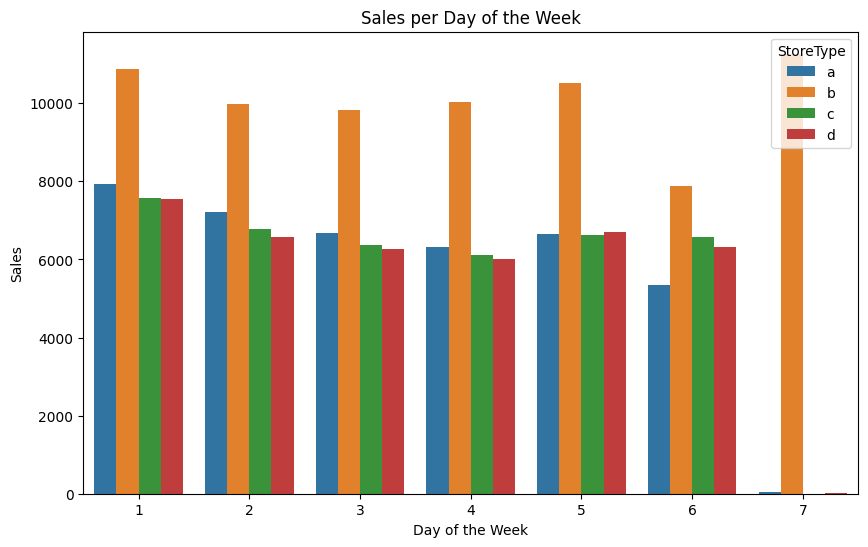

In [28]:
import matplotlib.pyplot as plt

# sales per day of the week, segmentet by store type
df_sales_per_day = df.groupby(['DayOfWeek', 'StoreType']).agg({
    'Sales': 'mean'
}).reset_index()

# Plot the sales per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', hue='StoreType', data=df_sales_per_day)
plt.title('Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()


### Hier ist mir relativ schnell aufgefallen, dass die Rossmann Stores mit dem Type "b", Sonntags fast alle Verkäufe einnehmen. Das kann wahrscheinlich den Grund haben, dass Stores mit dem Type "b" eine Sonderlizens besitzen beispielsweise für: Flughäfen, Bahnhöfe oder auch an Ferienorten, wo es einfach benötigt wird. Trotz dessen ist auch Type "b" an allen anderen Wochentagen, der beliebste Rossmann Type.

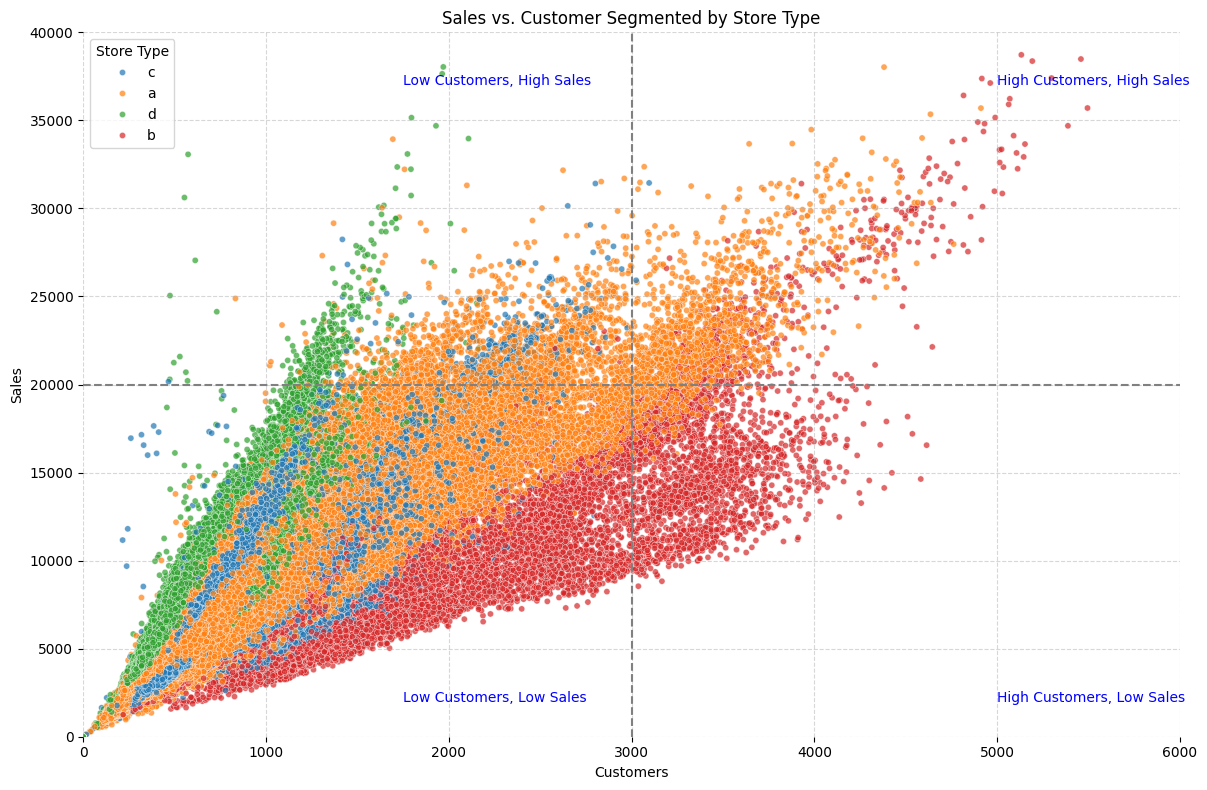

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define the figure and axes
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot the scatterplot with smaller circles and transparent fill for overlapping points
sns.scatterplot(x='Customers', y='Sales', hue='StoreType', data=df, ax=ax, s=20, alpha=0.7)

# Set the title and labels
plt.title('Sales vs. Customer Segmented by Store Type')
plt.xlabel('Customers')
plt.ylabel('Sales')

# Create a legend with frame
plt.legend(title='Store Type', loc='upper left', frameon=True)

# Add gridlines to improve readability
plt.grid(True, linestyle='--', alpha=0.5)

# Draw lines for sections
plt.axhline(20000, color='gray', linestyle='--')
plt.axvline(3000, color='gray', linestyle='--')

# Add annotations for sections
plt.text(1750, 37000, 'Low Customers, High Sales', fontsize=10, color='blue')
plt.text(5000, 37000, 'High Customers, High Sales', fontsize=10, color='blue')
plt.text(1750, 2000, 'Low Customers, Low Sales', fontsize=10, color='blue')
plt.text(5000, 2000, 'High Customers, Low Sales', fontsize=10, color='blue')

# Adjust the layout
plt.tight_layout()

plt.xlim(0, 6000)
plt.ylim(0, 40000)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Show the plot
plt.show()


### Auf dem Chart schauen wir noch einmal genauer auf dem StoreType in Bezug auf Sales und auch Customers. Hier ergibt sich ein relatives Muster zwischen den Farben. Von Links nach Rechts gesehen, sieht man erst Grün, Blau, Orange, vereinzelt Blau, wider Orange und dann Rot. Der Chart kann ziemlich gut darstellen, welche Store Types, welche Klassen (High/Low Customers / High/Low Sales) abfangen sollen. Wobei man mit bloßem Auge sagen kann, dass die meisten Käufe im Low Customers / Low Sales Bereich entstehen.

### Fazit: Ich fande, dieses Projekt hat im Kern Spaß gemacht und hatte auch seine Herausforderungen. Leider muss ich auch aber sagen, dass ich ein paar unerwartete Wendungen hatte, die mir alles ein wenig erschwert haben. Ich hätte einige Sachen direkt anders bearbeitet haben können, um mir so weniger Stress zu machen. Der Teil der mir im nachhinein am meisten Probleme bereitet hat, war im Overview, wo ich mir nicht die Test.csv angeschaut habe und deshalb mehrere Stunden arbeit in den Sand gesetzt habe.